In [1]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import matplotlib.pyplot as plt
%matplotlib inline
import imp 

In [10]:
subs=[264, 273, 862, 1125]
pth='/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/lregSeAes8_nokdsamp_1'
n_subs=len(subs)
try_thresh=np.arange(0.2,0.7,0.1)
n_thresh=len(try_thresh)

#preallocate mem
sens=np.zeros((n_subs, n_thresh))
total_hrs=np.zeros(n_subs)
total_clin_szrs=np.zeros(n_subs)
fp_per_day=np.zeros((n_subs, n_thresh))
mn_stim_lat=np.zeros((n_subs, n_thresh))

# Loop over files
for thresh_ct, thresh in enumerate(try_thresh):
    for sub_ct, sub in enumerate(subs):
        in_fname=str(sub)+'_thresh_0-'+str(int(10*thresh))+'_refract_0-5_stim_results.npz'
        npz=np.load(os.path.join(pth,in_fname))
        sens[sub_ct,thresh_ct]=npz['sens']
        fp_per_day[sub_ct,thresh_ct]=npz['fp_per_hour']*24
        mn_stim_lat[sub_ct,thresh_ct]=np.mean(npz['stim_latency_sec'])
        if thresh_ct==0:
            total_hrs[sub_ct]=npz['total_hrs']
            total_clin_szrs[sub_ct]=npz['n_clin_szr']
print(npz.keys())
print('Mean SD sensitivity: %f (%f)' % (np.mean(sens),np.std(sens)))

['stim_latency_sec', 'sens', 'n_clin_szr', 'n_true_pos', 'total_hrs', 'n_false_pos', 'fp_per_hour', 'stim_thresh', 'refract_min']
Mean SD sensitivity: 0.951607 (0.086311)


In [45]:
npz['stim_latency_sec']

array([ 21.2265625,   7.6171875,   9.546875 ,  18.484375 ,  15.9453125,
        12.390625 ,   7.6171875,   9.546875 ,   3.453125 ,   2.03125  ,
        16.65625  ,  12.2890625,   5.484375 ,   7.71875  ])

In [4]:
# Report total hours of EEG & # of clinical szrs
print('Total hours of test data: %f' % np.sum(total_hrs))
print('Total days of test data: %f' % np.sum(total_hrs/24))
print('Mean (SD) days of test data: %f (%f)' % (np.mean(total_hrs/24),np.std(total_hrs/24)))
print('Total # of clinical szrs: %d' % np.sum(total_clin_szrs))
print('Mean (SD) # of clinical szrs: %f (%f)' % (np.mean(total_clin_szrs),np.std(total_clin_szrs)))

Total hours of test data: 689.958524
Total days of test data: 28.748272
Mean (SD) days of test data: 7.187068 (1.478903)
Total # of clinical szrs: 39
Mean (SD) # of clinical szrs: 9.750000 (2.680951)


For Thresh: 0.500000
Mean (SD) Sensitivity: 0.932143 (0.081676)


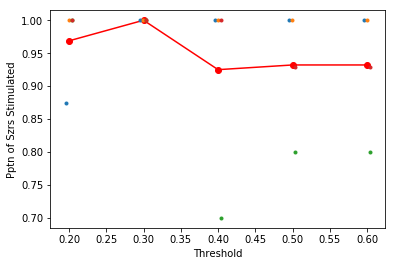

In [11]:
# Plot Sensitivity
plt.figure(1)
plt.clf()
plt.plot(try_thresh,np.mean(sens,axis=0),'ro-')
for sub_ct in range(n_subs):
    plt.plot(try_thresh+(np.random.rand(1)-.5)/50,sens[sub_ct,:],'.')
plt.xlabel('Threshold')
plt.ylabel('Pptn of Szrs Stimulated')

thresh_id=3
print('For Thresh: %f' % try_thresh[thresh_id])
print('Mean (SD) Sensitivity: %f (%f)' % (np.mean(sens[:,thresh_id]),np.std(sens[:,thresh_id])))

For Thresh: 0.500000
Mean (SD) False Positive Stim/Day: 567.470180 (428.042630)


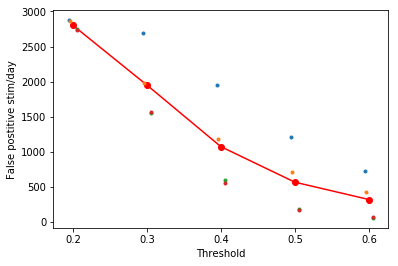

In [9]:
# Plot False Positive Stimulations/Day
plt.figure(2)
plt.clf()
plt.plot(try_thresh,np.mean(fp_per_day,axis=0),'ro-')
for sub_ct in range(n_subs):
    plt.plot(try_thresh+(np.random.rand(1)-.5)/50,fp_per_day[sub_ct,:],'.')
plt.xlabel('Threshold')
plt.ylabel('False postitive stim/day')
print('For Thresh: %f' % try_thresh[thresh_id])
print('Mean (SD) False Positive Stim/Day: %f (%f)' % (np.mean(fp_per_day[:,thresh_id]),np.std(fp_per_day[:,thresh_id])))

For Thresh: 0.500000
Mean (SD) Stim Latency: 51.977511 (71.801225) seconds


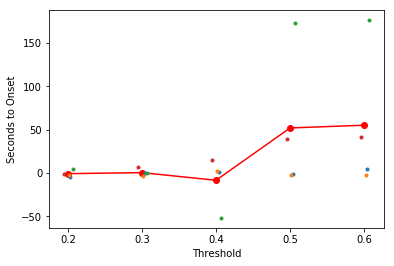

In [8]:
# Plot Mean Stim Latency for each Clinical Szr
plt.figure(3)
plt.clf()
plt.plot(try_thresh,np.mean(mn_stim_lat,axis=0),'ro-')
for sub_ct in range(n_subs):
    plt.plot(try_thresh+(np.random.rand(1)-.5)/50,mn_stim_lat[sub_ct,:],'.')
plt.xlabel('Threshold')
plt.ylabel('Seconds to Onset')
print('For Thresh: %f' % try_thresh[thresh_id])
print('Mean (SD) Stim Latency: %f (%f) seconds' % (np.mean(mn_stim_lat[:,thresh_id]),
                                                      np.std(mn_stim_lat[:,thresh_id])))